In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(["area_type","society","balcony","availability"], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

In [9]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23988\1418285638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3["bhk"]>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [18]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df4.shape

(13246, 6)

# Feature Engineering

In [20]:
df5 = df4.copy()

# Feature Engineering 
 
df5["price (lkr L)"] = df5["price"]*100000*3.5                            # cover to lacks and lankan rupees *3.5
df5 = df5.drop("price", axis=1)                                           # drop old price column

df5["price_per_sqft (lkr)"] = df5["price (lkr L)"] / df5["total_sqft"]    # cover to lacks *100000
df5.head()

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,13674500.0,12949.337121
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,42000000.0,16153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3,21700000.0,15069.444444
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,33250000.0,21860.618014
4,Kothanur,2 BHK,1200.0,2.0,2,17850000.0,14875.000000


In [21]:
df5["location"] = df5["location"].apply(lambda x: x.strip())
location_stats = df5["location"].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [22]:
location_stats_less_that_10 = location_stats[location_stats <= 10]
location_stats_less_that_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [23]:
df5["location"] = df5["location"].apply(lambda x: "other" if x in location_stats_less_that_10 else x)
len(df5["location"].unique())

242

In [24]:
df5

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,13674500.0,12949.337121
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,42000000.0,16153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3,21700000.0,15069.444444
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,33250000.0,21860.618014
4,Kothanur,2 BHK,1200.0,2.0,2,17850000.0,14875.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,5,80850000.0,23414.422242
13316,other,4 BHK,3600.0,5.0,4,140000000.0,38888.888889
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,2,21000000.0,18404.907975
13318,Padmanabhanagar,4 BHK,4689.0,4.0,4,170800000.0,36425.677117


# Outliar Detection

In [25]:
# Check sqft for per bhk
df5[df5["total_sqft"] / df5["bhk"] < 300].head()       # Think usually 1 bhk need 300sqft 

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
9,other,6 Bedroom,1020.0,6.0,6,129500000.0,126960.784314
45,HSR Layout,8 Bedroom,600.0,9.0,8,70000000.0,116666.666667
58,Murugeshpalya,6 Bedroom,1407.0,4.0,6,52500000.0,37313.432836
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,8,29750000.0,22037.037037
70,other,3 Bedroom,500.0,3.0,3,35000000.0,70000.000000


In [26]:
df5.shape

(13246, 7)

In [27]:
# Negate
df6 = df5[~(df5["total_sqft"] / df5["bhk"] < 300)]
df6.shape

(12502, 7)

In [28]:
# Check price per sqft
df6["price_per_sqft (lkr)"].describe()

count     12456.000000
mean      22079.759891
std       14588.445685
min         937.404346
25%       14736.842105
50%       18529.411765
75%       24208.333333
max      617647.058824
Name: price_per_sqft (lkr), dtype: float64

In [29]:
def remove_pps_outliars(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft (lkr)"])  # Mean
        st = np.std(subdf["price_per_sqft (lkr)"])  # Standard Daviation
        reduced_df = subdf[(subdf["price_per_sqft (lkr)"]>(m-st)) & (subdf["price_per_sqft (lkr)"]<=(m+st))] # Mean-Std, Mean+Std
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliars(df6)
df7.head()

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,149800000.0,52561.403509
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,67900000.0,41656.441718
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3,82250000.0,43866.666667
3,1st Block Jayanagar,3 BHK,1200.0,2.0,3,45500000.0,37916.666667
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2,51800000.0,41943.319838


In [30]:
df7.shape

(10241, 7)

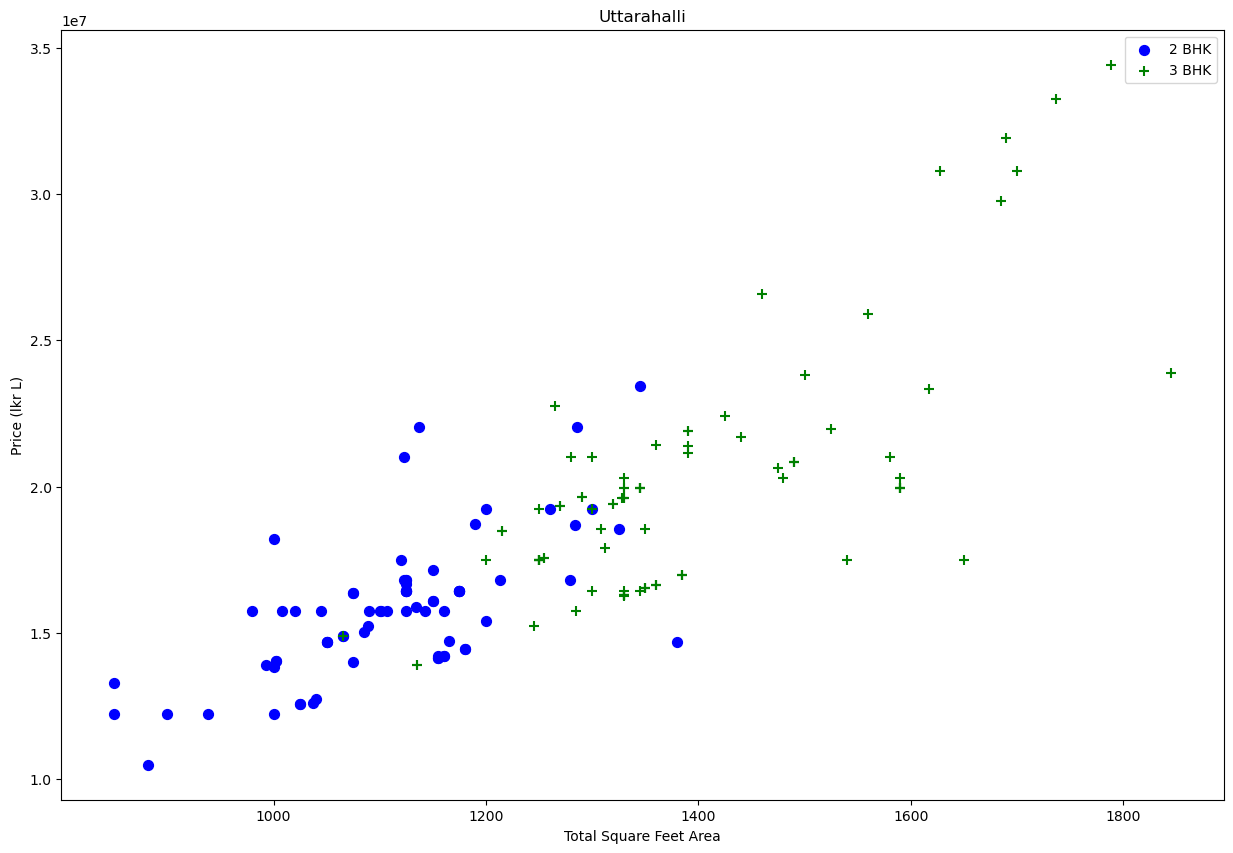

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bhk2["total_sqft"], bhk2["price (lkr L)"], color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3["total_sqft"], bhk3["price (lkr L)"], marker="+", color="green", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (lkr L)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Uttarahalli")

In [32]:
def remove_bhk_outliar(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df["price_per_sqft (lkr)"]),
                "std" : np.std(bhk_df["price_per_sqft (lkr)"]),
                "count" : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df["price_per_sqft (lkr)"] < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")

df8 = remove_bhk_outliar(df7)
df8.shape

(7329, 7)

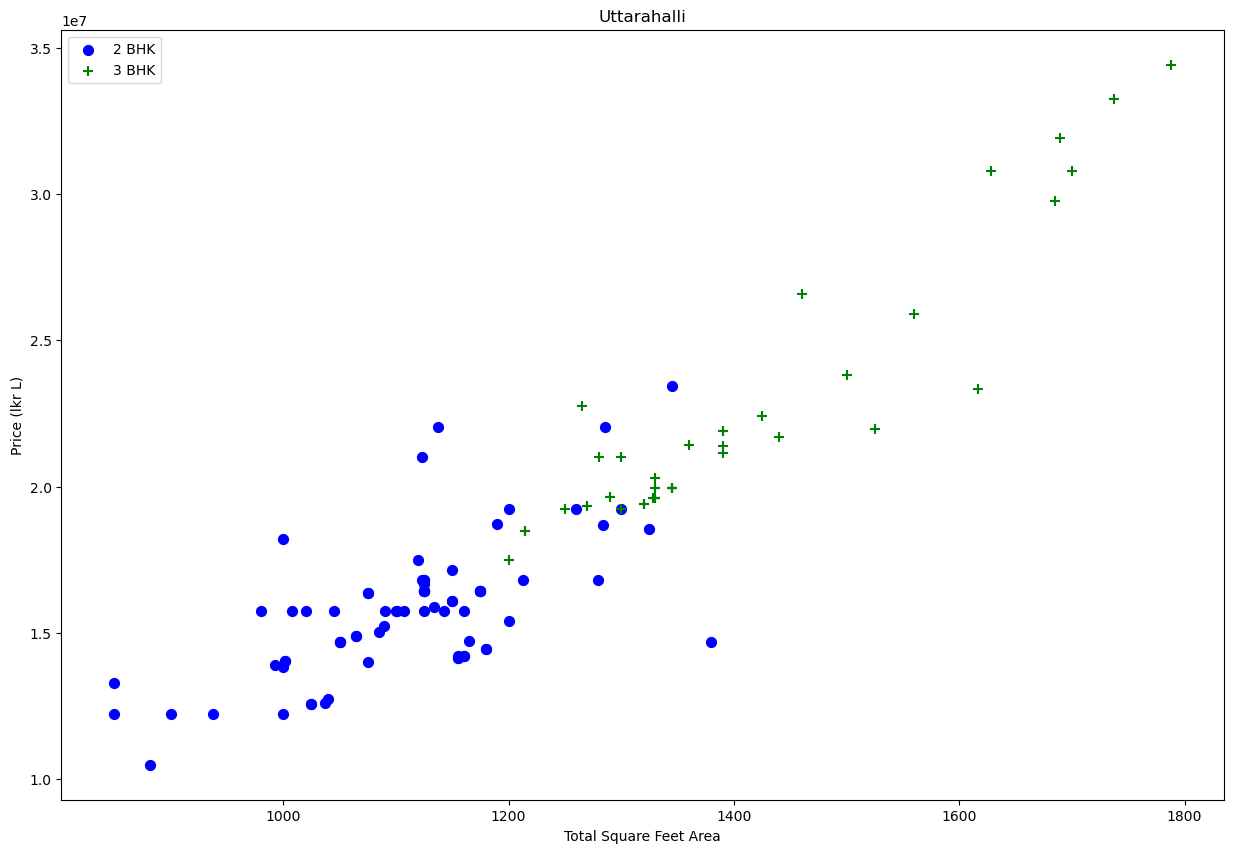

In [33]:
plot_scatter_chart(df8, "Uttarahalli")

### How many apartments that have in per squre foot area

Text(0, 0.5, 'Count')

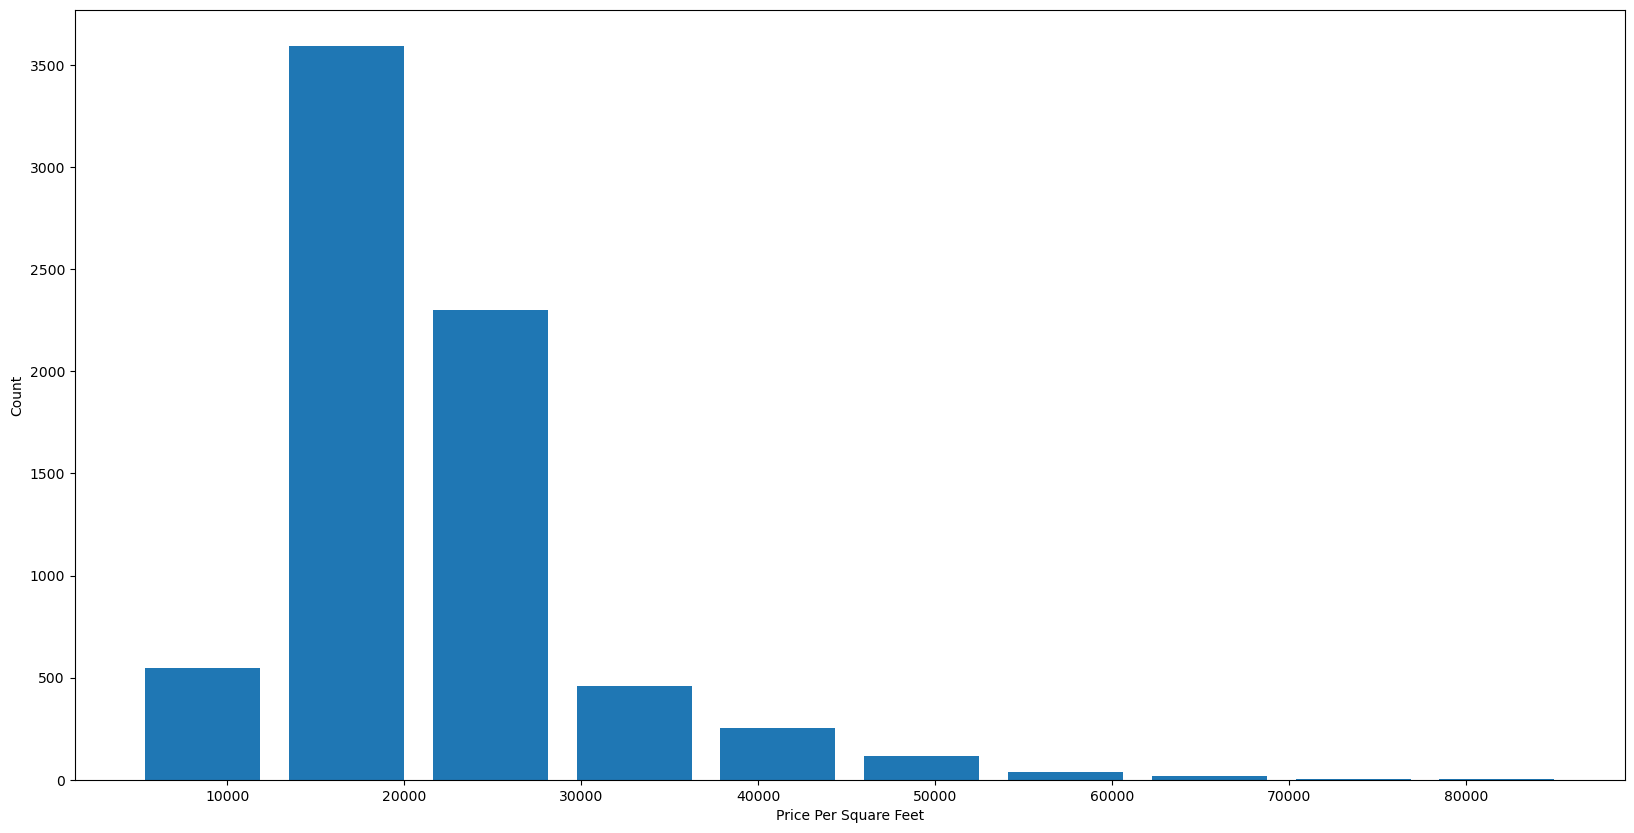

In [34]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8["price_per_sqft (lkr)"], rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [35]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [36]:
df8[df8["bath"] > 10]

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
5277,Neeladri Nagar,10 BHK,4000.0,12.0,10,56000000.0,14000.000000
8486,other,10 BHK,12000.0,12.0,10,183750000.0,15312.500000
8575,other,16 BHK,10000.0,16.0,16,192500000.0,19250.000000
9308,other,11 BHK,6000.0,12.0,11,52500000.0,8750.000000
9639,other,13 BHK,5425.0,13.0,13,96250000.0,17741.935484


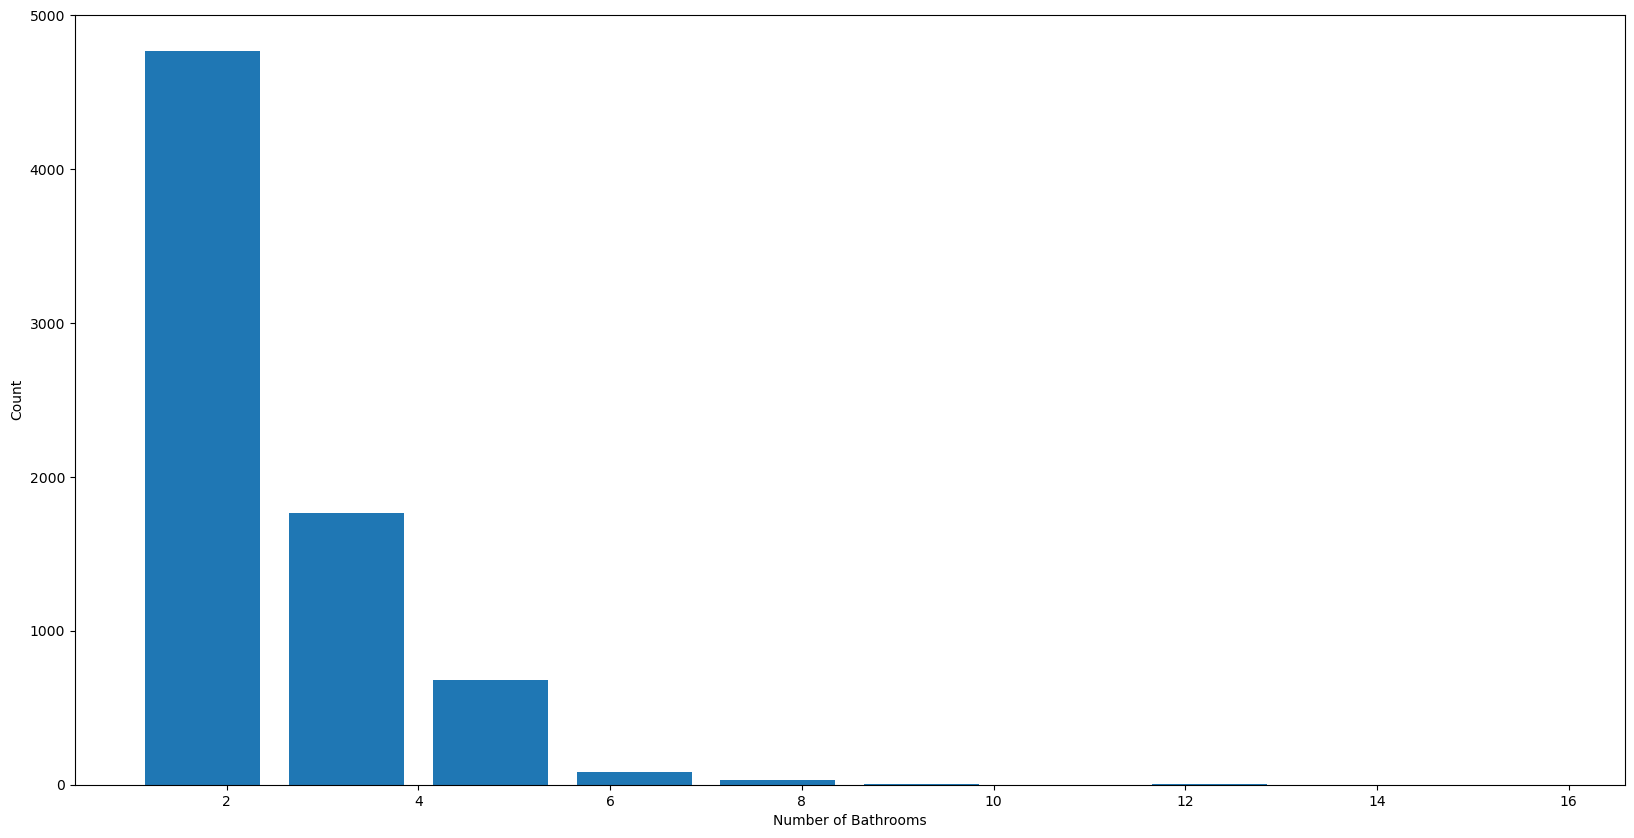

In [37]:
plt.hist(df8["bath"],rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [38]:
df8[df8["bath"] > df8["bhk"] + 2]

,location,size,total_sqft,bath,bhk,price (lkr L),price_per_sqft (lkr)
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,4,28000000.0,11382.113821
5238,Nagasandra,4 Bedroom,7000.0,8.0,4,157500000.0,22500.000000
6711,Thanisandra,3 BHK,1806.0,6.0,3,40600000.0,22480.620155
8411,other,6 BHK,11338.0,9.0,6,350000000.0,30869.641912


In [39]:
df8.shape

(7329, 7)

In [40]:
# Remove those outliars
df9 = df8[df8["bath"] < df8["bhk"] + 2]
df9.shape

(7251, 7)

In [41]:
df10 = df9.drop(["size","price_per_sqft (lkr)"], axis=1)
df10.head()

,location,total_sqft,bath,bhk,price (lkr L)
0,1st Block Jayanagar,2850.0,4.0,4,149800000.0
1,1st Block Jayanagar,1630.0,3.0,3,67900000.0
2,1st Block Jayanagar,1875.0,2.0,3,82250000.0
3,1st Block Jayanagar,1200.0,2.0,3,45500000.0
4,1st Block Jayanagar,1235.0,2.0,2,51800000.0


# Model Bulding

In [42]:
df10["location"].value_counts()

other                    1134
Whitefield                238
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Vishveshwarya Layout        4
Vishwapriya Layout          4
HAL 2nd Stage               4
2nd Stage Nagarbhavi        4
Marsur                      3
Name: location, Length: 242, dtype: int64

In [43]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df11 =  pd.concat([df10,dummies.drop("other", axis=1)], axis=1) 
df11.head()

,location,total_sqft,bath,bhk,price (lkr L),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,149800000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,3,67900000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,82250000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,3,45500000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,51800000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df12 = df11.drop("location", axis=1)
df12.head()

,total_sqft,bath,bhk,price (lkr L),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,149800000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,67900000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,82250000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,45500000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,51800000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df12.shape

(7251, 245)

In [47]:
X = df12.drop("price (lkr L)", axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y = df12["price (lkr L)"]
y.head()

0    149800000.0
1     67900000.0
2     82250000.0
3     45500000.0
4     51800000.0
Name: price (lkr L), dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874293

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,LinearRegression,0.819001,"{'copy_X': True, 'fit_intercept': False}"
1,Lasso,0.818362,{'alpha': 100.0}
2,DecisionTreeRegressor,0.716380,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [106]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]/100000

In [107]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


292.24666370103455

In [108]:
predict_price("Indira Nagar", 1500, 3, 5)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


772.6118170892074

In [109]:
import pickle

with open("home_price_prediction_model.pickle", "wb") as file:
    pickle.dump(lr_clf, file)

In [110]:
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}
with open("columns.json","w") as file:
    file.write(json.dumps(columns))